# Modelado Matemático - Introducción a la estadística bayesiana

**Carlos Andrés Bautista Torres**

código: 2208057

<img src="auxiliares\portada.jpg" width="100%" align="center" >


### _*En este notebook se realiza con el fin de interiorizar el concepto de estadística bayesiana, y para ello se encontrará la ecuación de la recta apropiada para modelar un conjunto de datos (puntos) que se obtienen artificialmente.*_



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

### _*Se definen las funciones que permitirán generar los valores aleatorios ligados a una recta $y = mx + b$.*_

In [2]:
def make_gaussian(tpl,x): # Función que realiza una gaussiana a partir de mu, sigma y A.
    mu = tpl[0]
    sigma = tpl[1]
    A = tpl[2]
    gauss = A*np.exp(-((x-mu)**2)/2/sigma**2)
    return gauss

def ErrorFunc(tpl,x,y):
    gauss = make_gaussian(tpl,x)
    chi = np.ravel(y-gauss)
    return chi

def funcline(params,x): # Crea una recta.
    return params[0]*x+params[1]


def Errorlineal(tpl,x,y): # Calcula la diferencia entre datos y modelo para calcular el chi^2.
    return funcline(tpl,x)-y


def graficalineal(x,y): # Calcula la mejor tupla (m,b) y grafica la recta con dichos valores.
    p0 = [0,0]
    bestt,suss = leastsq(Errorlineal, p0, args=(x,y))
    y2 = funcline(bestt,x)
    plt.plot(x,y, "or")
    plt.plot(x,y2, ":k")
    print(bestt[0], bestt[1])

In [3]:
x = np.arange(0,10,1)
tpl = [2,0.1]

np.random.seed(1)
error = np.random.randint(1,10,10) # Desde 1 para que al calcular el chi^2 no de una indeterminación.
ruido = np.random.normal(0,1,10)

y = funcline(tpl, x)
y_ruido = y + ruido

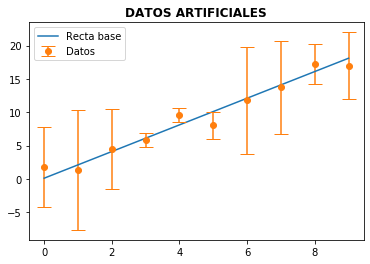

In [4]:
plt.plot(x,y, label="Recta base")
plt.errorbar(x,y_ruido, error,capsize=7, fmt='o',label="Datos")
plt.title("DATOS ARTIFICIALES", fontweight="bold")
plt.legend()


1.8812463680832587 0.6126560864239234


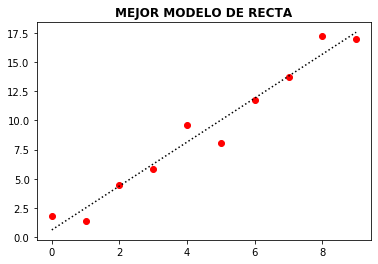

In [5]:
plt.title("MEJOR MODELO DE RECTA", fontweight="bold")
graficalineal(x,y_ruido)

In [6]:
best_m = 1.8812463680832587
best_b = 0.6126560864239234

### _*Basandonos en los resultados de la mejor pendiente y el mejor intercepto, se crea una malla para el espacio de parámetros (m,b) y observar donde se encuentran los valores más bajos para $\chi^2$.*_ 

In [7]:
b_list = np.arange(-5,7,0.5) # Se crea el dominio de los parámetros (m,b).
m_list = np.arange(-2,6,0.5)

chi2 = np.zeros((b_list.size,m_list.size))

for i in range(b_list.size):
    for j in range(m_list.size):
        
        y_model = m_list[j]*x + b_list[i]
        
        chi2[i,j] = (((y_model-y_ruido)/error)**2).sum() # Se crea el mapa de chi^2.
        

Text(0.5, 1.0, '$\\chi^2$ en el espacio de parámetros (m,b)')

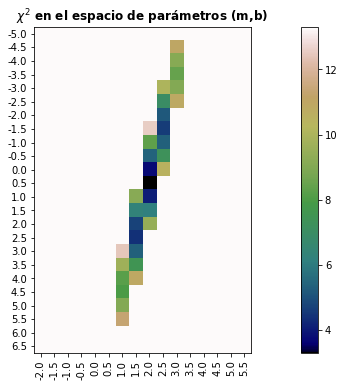

In [8]:
fig = plt.figure()
fig.set_size_inches(18,6)
plt.imshow(chi2,vmax=13.3, cmap="gist_earth")
plt.yticks(ticks=np.arange(0,b_list.size, 1),labels=b_list)
plt.xticks(ticks=np.arange(0,m_list.size, 1),labels=m_list,rotation=90)
plt.colorbar()
plt.title("$\chi^2$ en el espacio de parámetros (m,b)", fontweight="bold")

### <span style = 'color:green'> DISTRIBUCIÓN DE PROBABILIDAD
    
### _*A partir de este punto ya se puede encontrar la distribución de probabilidad, considerando la siguiente relación:*_

$P\left(x_k|\mu,\sigma,H\right) \propto \exp\left[-\dfrac{(x_k -\mu)^2}{2\sigma^2}\right]\:,$

### _*en donde, por definición, $\chi^2 =\dfrac{(x_k -\mu)^2}{\sigma^2},$ y $\sigma$ es el "peso" de cada diferencia, dado por las barras de error.*_

In [9]:
like = np.exp(-chi2/2) # Se define la función de probabilidad.
pt = like.sum()
like = like/pt # Y posteriormente se normaliza.

Text(0.5, 1.0, 'distribución de probabilidad')

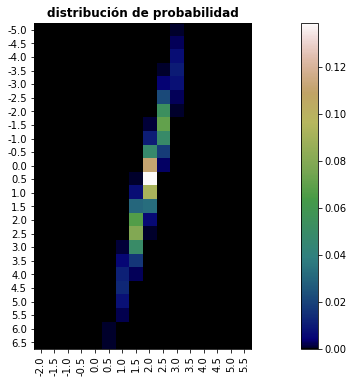

In [10]:

fig = plt.figure()
fig.set_size_inches(18,6)
plt.imshow(like, cmap="gist_earth")
plt.yticks(ticks=np.arange(0,b_list.size, 1),labels=b_list)
plt.xticks(ticks=np.arange(0,m_list.size, 1),labels=m_list,rotation=90)
plt.colorbar()
plt.title("distribución de probabilidad", fontweight="bold")

### <span style = 'color:green'> MARGINALIZACIÓN

### _*Consiste en reducir la dimensión del espacio de parámetro para poder observar el comportamiento de cada uno de ellos por separado,*_

$P(x|H) = \int P(x,y|H)dy\:\:.$

### _*En este caso $x\rightarrow m$ y $y\rightarrow b$.*_

Text(0.5, 1.0, 'Distribución de probabilidad para el intercepto')

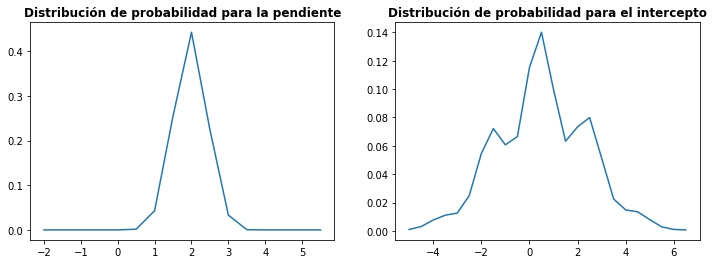

In [11]:
prob_m = like.sum(axis=0) # Se integra en el eje correspondiente a b.
prob_m.size

prob_b = like.sum(axis=1) # Se integra en el eje correspondiente a m.
prob_b.size


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(m_list,prob_m)
plt.title("Distribución de probabilidad para la pendiente", fontweight="bold")

plt.subplot(1,2,2)
plt.plot(b_list,prob_b)
plt.title("Distribución de probabilidad para el intercepto", fontweight="bold")


### <span style = 'color:green'> MEJORANDO LA RESOLUCIÓN DE LA MALLA

### _*Según las gráficas anteriores el intervalo tomado para las pendientes es amplio, pues la función de distribución decae rápidamente. Sin embargo, la función de distribución para el intercepto hay que ampliarlo.*_

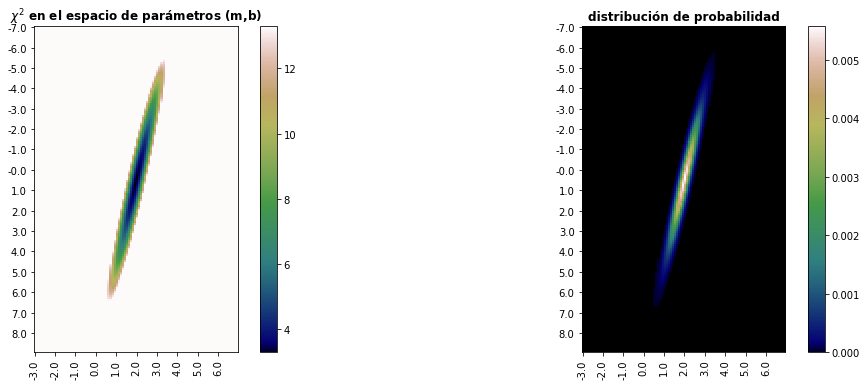

In [12]:
'''------Se refina la malla y se realiza el mismo cálculo anterior.-----------'''

b_list2 = np.arange(-7,9,0.1)  
m_list2 = np.arange(-3,7,0.1)

chi22 = np.zeros((b_list2.size,m_list2.size))

for i in range(b_list2.size):
    for j in range(m_list2.size):
        
        y_model2 = m_list2[j]*x + b_list2[i]
        
        chi22[i,j] = (((y_model2-y_ruido)/error)**2).sum() 


like2 = np.exp(-chi22/2)
pt2 = like2.sum()
like2 = like2/pt2

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,6))

plt.subplot(1,2,2)
plt.imshow(like2, cmap="gist_earth")
plt.yticks(ticks=np.arange(0,b_list2.size, 10),labels=np.round(b_list2[::10],2))
plt.xticks(ticks=np.arange(0,m_list2.size, 10),labels=np.round(m_list2[::10],2),rotation=90)
plt.title("distribución de probabilidad", fontweight="bold")
plt.colorbar()

plt.subplot(1,2,1)
plt.imshow(chi22,vmax=13.3, cmap="gist_earth")
plt.yticks(ticks=np.arange(0,b_list2.size, 10),labels=np.round(b_list2[::10],2))
plt.xticks(ticks=np.arange(0,m_list2.size, 10),labels=np.round(m_list2[::10],2),rotation=90)
plt.title("$\chi^2$ en el espacio de parámetros (m,b)", fontweight="bold")
plt.colorbar()

Text(0.5, 1.0, 'Distribución de probabilidad para el intercepto')

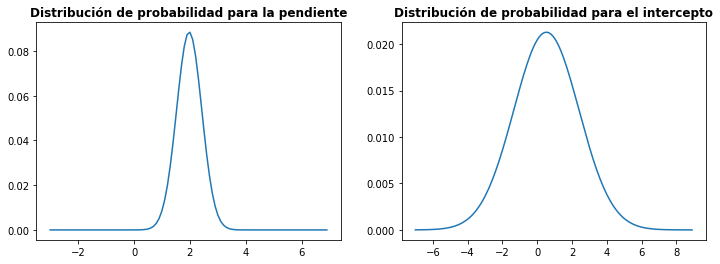

In [13]:
prob_m2 = like2.sum(axis=0)
prob_m2.size

prob_b2 = like2.sum(axis=1)
prob_b2.size


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(m_list2,prob_m2)
plt.title("Distribución de probabilidad para la pendiente", fontweight="bold")

plt.subplot(1,2,2)
plt.plot(b_list2,prob_b2)
plt.title("Distribución de probabilidad para el intercepto", fontweight="bold")

### _*¡QUÉ BELLEZA!*_

### <span style = 'color:green'> DESVIACIÓN ESTANDAR DEL VALOR CALCULADO PARA LOS PARÁMETROS

### _*Debido a que los errores provienen de una distribución gaussiana, se utiliza la función "Make_gaussian" para encontrar la amplitud, dispersión y la media de la función gaussiana que mejor describe el conjunto de datos*_

In [14]:
tpl = [1,0.3,1]
best_paramsm,success = leastsq(ErrorFunc, tpl, args = (m_list2,prob_m2)) # Se optimiza la gaussiana para m.
print("los mejores parámetros para m son", best_paramsm)

tpl = [1,0.3,1]
best_paramsb,success = leastsq(ErrorFunc, tpl, args = (b_list2,prob_b2)) # Se optimiza la gaussiana para b.
print("los mejores parámetros para b son", best_paramsb)

los mejores parámetros para m son [1.97394727 0.4507494  0.08850904]
los mejores parámetros para b son [0.52719441 1.8737289  0.02129199]


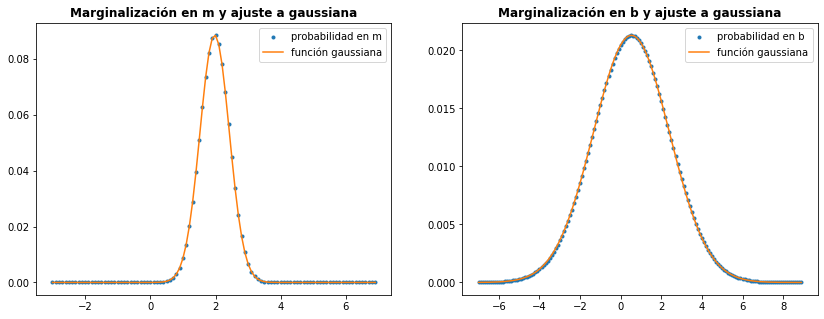

In [15]:
gausm = make_gaussian(best_paramsm, m_list2)
gausb = make_gaussian(best_paramsb, b_list2)


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(m_list2, prob_m2, ".", label="probabilidad en m")
plt.plot(m_list2, gausm, label="función gaussiana")
plt.title("Marginalización en m y ajuste a gaussiana", fontweight="bold")
plt.legend()

plt.subplot(1,2,2)
plt.plot(b_list2, prob_b2, ".", label="probabilidad en b")
plt.plot(b_list2, gausb, label="función gaussiana")
plt.title("Marginalización en b y ajuste a gaussiana", fontweight="bold")
plt.legend()

### _*A partir del análisis anterior se obtiene que la dispersión para los parámetros $m$ y $b$ son $\sigma_m = 0.4507494$ y $\sigma_b = 1.8737289$ respectivamente. Por otra parte, la media para los parámetros $m$ y $b$ son $\mu_m = 1.97394727$ y $\mu_b = 0.52719441$ respectivamente. Estos valores se pueden corroborar observando las gráficas anteriores.*_

### <span style = 'color:green'> CONTORNOS DE PROBABILIDAD

### _*Para obtener los contornos de probabilidad de 66%, 90%, 95% y 99%, se debe sumar la probabilidad de cada celda dentro del contorno, para ello se define una función...*_

In [16]:
b_list3 = np.arange(-5,6,0.1) # Se crea la malla para el espacio de parámetros.
m_list3 = np.arange(-0,3.5,0.1)

def mask_finder(limit):
    prob = 0 # Se inicializa el contador.
    for i in range(b_list3.size):
        for j in range(m_list3.size):
            if  like3[i,j] >= limit:
                prob = prob + like3[i,j] # Esto se puede debido a que la malla no es adaptativa.
    return prob


In [17]:
chi23 = np.zeros((b_list3.size,m_list3.size)) # Se calcula el chi^2 en el espacio de parámetros.

for i in range(b_list3.size):
    for j in range(m_list3.size):
        
        y_model3 = m_list3[j]*x + b_list3[i]
        
        chi23[i,j] = (((y_model3-y_ruido)/error)**2).sum() 

like3 = np.exp(-chi23/2)
pt3 = like3.sum()
like3 = like3/pt3

In [18]:
'''Cada valor corresponde a un contorno de isoprobabilidad cuya región interior equivale a un porcentaje
determinado, 66%, 90%, 95% y 99%.'''
print(mask_finder(0.00192))
print(mask_finder(0.00057))
print(mask_finder(0.00030))
print(mask_finder(0.00008))

0.660368728969589
0.9019742931390377
0.9509919607755559
0.9893514621999852


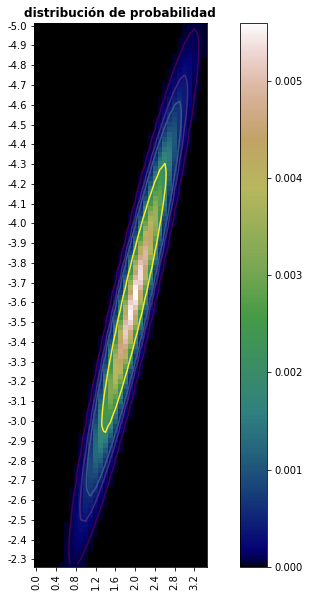

In [52]:
fig, (ax1) = plt.subplots(1,1, figsize=(12,10))
plt.contour(like3, [0.00008, 0.00030, 0.00057,0.00192 ])
plt.imshow(like3, cmap="gist_earth")
plt.yticks(ticks=np.arange(0,b_list3.size, 4),labels=np.round(b_list3[::1],2))
plt.xticks(ticks=np.arange(0,m_list3.size, 4),labels=np.round(m_list3[::4],2),rotation=90)
plt.title("distribución de probabilidad", fontweight="bold")
plt.colorbar()

### <span style = 'color:green'> MALLA ADAPTATIVA

### Se propondrán dos niveles, es decir, una malla que esté refinada en la zona central. Para ello se definirá una función de la siguiente forma:

In [20]:
def Adapt_mesh(xmin, xmax, delta1, delta2):
    rango = xmax - xmin # Determina el intervalo total de la malla
    x1 = np.arange(xmin, xmin + rango/3, delta1)
    x2 = np.arange(xmin + rango/3, xmin + 2*rango/3 , delta2)
    x3 = np.arange(xmin + 2*rango/3, xmax, delta1)
    x  = np.concatenate((x1, x2, x3), axis=None)
    return x

In [21]:
delt1 = 0.1 # Será el espaciamiento de la región menos refinada.
delt2 = 0.05 # Será el espaciamiento de la región más refinada.
m_adapt = Adapt_mesh(-3, 7, delt1, delt2)
b_adapt = Adapt_mesh(-7, 9, delt1, delt2)

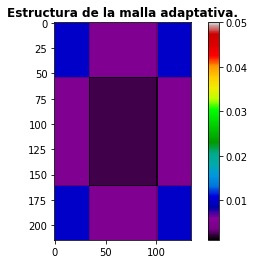

In [55]:
''' Aquí un ejemplo que permite observar la estructura de esta malla adaptativa.'''
ojo = np.zeros((b_adapt.size, m_adapt.size))

for i in range(b_adapt.size):
    for j in range(m_adapt.size):
        ojo[i,j] = np.abs(b_adapt[i]-b_adapt[i-1])*np.abs(m_adapt[j]-m_adapt[j-1])  
        
plt.imshow(ojo, vmax=0.05, cmap="nipy_spectral")
plt.title("Estructura de la malla adaptativa.", fontweight = "bold")
plt.colorbar()

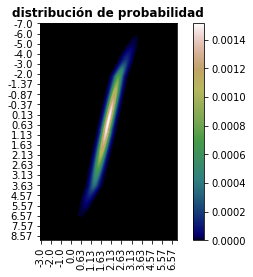

In [23]:
chi2a = np.zeros((b_adapt.size, m_adapt.size))

for i in range(b_adapt.size):
    for j in range(m_adapt.size):
        
        y_adapt = m_adapt[j]*x + b_adapt[i]
        chi2a[i,j] = (((y_adapt-y_ruido)/error)**2).sum() 

likea = np.exp(-chi2a/2)
pta = likea.sum()
likea = likea/pta


plt.imshow(likea,  cmap="gist_earth")
plt.yticks(ticks=np.arange(0,b_adapt.size, 10),labels=np.round(b_adapt[::10],2))
plt.xticks(ticks=np.arange(0,m_adapt.size, 10),labels=np.round(m_adapt[::10],2),rotation=90)
plt.title("distribución de probabilidad", fontweight="bold")
plt.colorbar()

In [24]:
prob_m3 = likea.sum(axis=0)
prob_m3.size

prob_b3 = likea.sum(axis=1)
prob_b3.size

tpl = [1,0.3,1]
best_paramsm,success = leastsq(ErrorFunc, tpl, args = (m_adapt,prob_m3))
print("los mejores parámetros para m son", best_paramsm)

tpl = [1,0.3,1]
best_paramsb,success = leastsq(ErrorFunc, tpl, args = (b_adapt,prob_b3))
print("los mejores parámetros para b son", best_paramsb)

los mejores parámetros para m son [ 1.95410177 -0.40899289  0.04899082]
los mejores parámetros para b son [0.52719453 1.87372641 0.01156466]


### _*A partir del análisis anterior se obtiene que la dispersión para los parámetros $m$ y $b$ son $\sigma_m = 0.40899289$ y $\sigma_b = 1.87372641$ respectivamente, prácticamente los mismos resultados obtenidos con la malla uniforme. Por otra parte, la media para los parámetros $m$ y $b$ son $\mu_m = 1.95410177$ y $\mu_b = 0.52719453$ respectivamente igual que en el caso de malla uniforme.*_

### <span style = 'color:green'> ANÁLISIS TEÓRICO DE LA ELIPSE

### _*La matriz de Fisser o Hessiano se calcula a partir de las segundas derivadas de la probabilidad con respecto a los parámetros.*_

$\mathbf{F} = - \begin{bmatrix}A & C \\ C & B \end{bmatrix}$

### _*en donde*_

$A = \left(\dfrac{\partial^2 L}{\partial m^2}\right)_0, \:\:\: B = \left(\dfrac{\partial^2 L}{\partial b^2}\right)_0, \:\:\: C = \left(\dfrac{\partial^2 L}{\partial m\partial b} \right)_0.$

### _*Teniendo en cuenta que la distribución de probabilidad es de la forma*_

$P \propto \text{exp}\left[-\left(\dfrac{(m - m_0)^2}{2\sigma_m^2} + \dfrac{(b - b_0)^2}{2\sigma_b^2} \right)\right] $

### _*su logaritmo natural es*_

$ L = \text{ln}\: P = \left[-\left(\dfrac{(m - m_0)^2}{2\sigma_m^2} + \dfrac{(b - b_0)^2}{2\sigma_b^2} \right)\right]\:,$

### _*y por lo tanto, las primeras derivadas con respecto a los parámetros son*_

$\dfrac{dL}{dm} = -\dfrac{m-m_0}{\sigma_m^2} \:\:\: \wedge\:\:\: \dfrac{dL}{db} = -\dfrac{b-b_0}{\sigma_b^2} $

### _*y sus segundas derivadas son*_

$\dfrac{d^2L}{dm^2} = -\dfrac{1}{\sigma_m^2} \:\:\: \wedge\:\:\: \dfrac{d^2L}{db^2} = -\dfrac{1}{\sigma_b^2} $

### _*donde las derivadas mixtas son nulas y la matriz de Fisser adquiere la forma*_

$\mathbf{F} =  -\begin{bmatrix}\dfrac{1}{\sigma_m^2} & 0 \\ 0 & \dfrac{1}{\sigma_b^2} \end{bmatrix} = -\begin{bmatrix}4.9229 & 0 \\ 0 & 0.2848 \end{bmatrix} $

### _*siendo los autovalores $\lambda_1 = -4.9229$ y $\lambda_2 = -0.2848$, al ser una matriz diagonal. Para hallar los valores de los semiejes de la elipse es necesario realizar el siguiente producto:*_

$Q = k = \mathbf{W}\:\mathbf{F}\: \mathbf{W}^T  = \begin{bmatrix}\mu_m \:\: \mu_b \end{bmatrix} \begin{bmatrix}\dfrac{-1}{\sigma_m^2} & 0 \\ 0 & \dfrac{-1}{\sigma_b^2} \end{bmatrix}
\begin{bmatrix}\mu_m \\ \mu_b \end{bmatrix} = - 19.2742$ 

### _*Por lo tanto los valores para los semiejes son:*_

$e_1 = \sqrt{\frac{k}{\lambda_1}}= 1.9787 \:\: \wedge \:\: e_2 = \sqrt{\frac{k}{\lambda_2}}= 8.2265 $  

### _*Esto se puede verificar usando las siguientes expresiones:*_

### $\sigma_m = \sqrt{\frac{-B}{AB-C^2}} \:\:\: \wedge \:\: \: \sigma_b = \sqrt{\frac{-A}{AB-C^2}}$ _*con $C=0$ se tiene que $\sigma_m = \sqrt{\frac{-1}{A}} \:\:\: \wedge \:\: \: \sigma_b = \sqrt{\frac{-1}{B}}$ siendo $A = \frac{-1}{\sigma_m}$ y $B = \frac{-1}{\sigma_b}$*_

### <span style = 'color:green'> INCORPORANDO PRIOR 

### _*Si se considerara que los valores del intercepto tienen que ser siempre positivos, la manera de expresar esta condición es usando un prior de forma de escalón unitario, $P(H) = 0 \:\: \text{si} \:\: b < 0$ y $P(H) = 1 \:\: \text{si} \:\: b \geq 0$*_

In [25]:
def prior(b):
    if b < 0:
        pri = 0
    else:
        pri = 1
    return pri

In [40]:
b_list4 = np.arange(-7,9,0.1)
m_list4 = np.arange(-3,7,0.1)

chi24 = np.zeros((b_list4.size,m_list4.size))

for i in range(b_list4.size):
    for j in range(m_list4.size):
         
        y_model4 = m_list4[j]*x + b_list4[i]
        
        chi24[i,j] = (((y_model4-y_ruido)/error)**2).sum()
        
        if prior(b_list4[i]) == 0:  # En estas líneas se tiene en cuenta el valor de la función prior.
            chi24[i,j] = 0.0


like4 = np.exp(-chi24/2)
pt4 = like4.sum()
like4 = like4/pt4

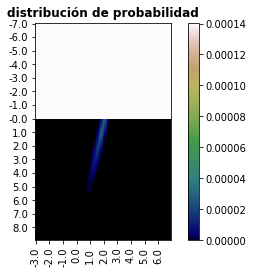

In [41]:
plt.imshow(like4, cmap = "gist_earth")
plt.yticks(ticks=np.arange(0,b_list4.size, 10),labels=np.round(b_list4[::10],2))
plt.xticks(ticks=np.arange(0,m_list4.size, 10),labels=np.round(m_list4[::10],2),rotation=90)
plt.title("distribución de probabilidad", fontweight="bold")
plt.colorbar()


In [49]:
like4.sum()

1.0

### _*Al imponer el prior se re-distribuye la función de probabilidad hacia la zona de valores $b >= 0$, sin embargo la forma de la elipse no se ve modificada como tal, sino cortada abruptamente por el eje $b = 0$.*_ 